In [17]:
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Model-specific imports:
from sklearn.linear_model import LinearRegression

In [19]:
inputData = pd.read_excel(r'/Users/meryckmucenski/Desktop/Volumetric_features-2.xlsx', engine='openpyxl').sample(frac = 1)

inputData.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
2990,2991,45570.8,5274.8,7106.0,41605.4,5282.7,4753.5,2542.5,1452.2,2535.9,...,1.987,2.672,2.083,1.891,2.477,2.08120,805890,1374461.367,88,5
1029,1030,16578.2,1730.5,12020.4,50486.5,5106.3,2439.8,2830.6,1590.8,2735.1,...,2.033,2.383,2.923,2.283,2.568,1.97797,912273,1375237.258,79,1
3614,3615,6606.5,264.3,13484.6,54504.0,7093.2,3351.1,4285.3,2043.5,884.3,...,2.504,2.809,2.661,2.341,2.990,2.42507,1063232,1414327.952,28,9
3808,3809,5187.9,112.6,12390.9,44611.9,6756.0,2980.0,4063.1,1711.7,577.8,...,2.562,2.788,3.835,2.325,3.028,2.52504,952024,1288232.072,47,9
1340,1341,20873.2,664.6,15999.1,52865.3,8022.7,3296.9,4720.3,2298.4,2406.0,...,2.333,2.534,3.723,2.101,2.794,2.33026,1293454,1809601.287,75,2


In [20]:
# select the input brain volume vector (X) and the output age vector (y)
X = inputData.drop(columns=['S.No', 'Age', 'dataset'])
y = inputData['Age']

cor = inputData.corr()
#Correlation with output variable
cor_target = abs(cor["Age"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.6]
relevant_features


Left-Thalamus                        0.696598
3rd-Ventricle                        0.616427
Left-Hippocampus                     0.601390
Left-Amygdala                        0.612836
Left-choroid-plexus                  0.630961
Right-Thalamus                       0.677696
Right-Putamen                        0.620966
Right-Accumbens-area                 0.658007
lhCortexVol                          0.657288
rhCortexVol                          0.656251
CortexVol                            0.658139
SubCortGrayVol                       0.676319
TotalGrayVol                         0.668308
lh_inferiorparietal_thickness        0.629624
lh_parsopercularis_thickness         0.640510
lh_parstriangularis_thickness        0.635172
lh_postcentral_thickness             0.606031
lh_precentral_thickness              0.638825
lh_precuneus_thickness               0.634651
lh_rostralmiddlefrontal_thickness    0.648759
lh_superiorfrontal_thickness         0.695692
lh_superiortemporal_thickness     

In [25]:
# re-initializing data with features that have a score >0.6
inputData = pd.read_excel(r'/Users/meryckmucenski/Desktop/Volumetric_features-newest.xlsx', engine='openpyxl').sample(frac = 1)

inputData.head()

,S.No,Left-Thalamus,3rd-Ventricle,Left-Hippocampus,Left-Amygdala,Left-choroid-plexus,Right-Thalamus,Right-Putamen,Right-Accumbens-area,lhCortexVol,...,rh_inferiorparietal_thickness,rh_parsopercularis_thickness,rh_parstriangularis_thickness,rh_postcentral_thickness,rh_precentral_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_supramarginal_thickness,rh_MeanThickness_thickness,Age
1452,1453,6521.9,895.1,3260.7,1156.1,278.2,6021.7,3651.5,367.7,178282.3616,...,2.400,2.477,2.252,1.888,2.433,2.172,2.439,2.393,2.29707,60
226,227,6279.4,1457.4,3147.6,1040.8,790.7,5976.2,3437.8,420.2,166489.6578,...,2.163,2.277,2.186,1.755,1.945,2.256,2.297,2.286,2.16620,83
1807,1808,10751.9,952.1,4712.8,1864.1,163.0,8916.7,5734.9,709.3,264195.2816,...,2.646,2.728,2.670,2.060,2.511,2.451,2.764,2.685,2.49529,35
3097,3098,5890.4,1195.7,3620.5,1225.9,823.8,5808.2,4396.2,551.7,224967.2952,...,2.383,2.404,2.260,1.911,2.465,2.306,2.507,2.426,2.36374,72
2748,2749,6001.8,2070.5,3298.8,1416.7,1005.2,6472.5,5230.8,486.6,230352.3073,...,2.394,2.528,2.329,1.962,2.303,2.280,2.670,2.294,2.35100,62


In [28]:
# select the input brain volume vector (X) and the output age vector (y)
X = inputData.drop(columns= ['Age'])
y = inputData['Age']
# split the X and y vectors into training and testing dataset
# we're using 80% for training and 20% for testing, but this can change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Feature 0: 857.935518
Feature 1: 3170.648660
Feature 2: 2132.476753
Feature 3: 1913.294000
Feature 4: 1941.770053
Feature 5: 2198.826437
Feature 6: 2829.101956
Feature 7: 2089.461984
Feature 8: 2532.429595
Feature 9: 2548.589491
Feature 10: 2533.952932
Feature 11: 2560.781531
Feature 12: 2816.808318
Feature 13: 2715.923704
Feature 14: 2139.875950
Feature 15: 2280.818707
Feature 16: 1972.607271
Feature 17: 2244.454969
Feature 18: 2203.565856
Feature 19: 2421.360281
Feature 20: 3031.034839
Feature 21: 2797.494128
Feature 22: 2548.277269
Feature 23: 3231.149173
Feature 24: 2312.269460
Feature 25: 2428.478509
Feature 26: 2943.459113
Feature 27: 1937.181879
Feature 28: 2014.579534
Feature 29: 2235.992112
Feature 30: 2693.720506
Feature 31: 2610.589226
Feature 32: 3254.810946


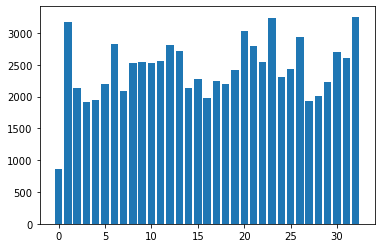

In [29]:
#graphing feature scores (features with larger column are more important)
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as pyplot
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    # plot the scores
    
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [30]:
import numpy as np
from sklearn.feature_selection import f_regression

k = 10    # number of best features to obtain

indices = np.argsort(fs.scores_)[::-1]
#printing best features from first to last
print(indices)

[32 23  1 20 26  6 12 21 13 30 31 11  9 22 10  8 25 19 24 15 17 29 18  5
 14  2  7 28 16  4 27  3  0]


In [31]:
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library

import os
inputData.corr()

,S.No,Left-Thalamus,3rd-Ventricle,Left-Hippocampus,Left-Amygdala,Left-choroid-plexus,Right-Thalamus,Right-Putamen,Right-Accumbens-area,lhCortexVol,...,rh_inferiorparietal_thickness,rh_parsopercularis_thickness,rh_parstriangularis_thickness,rh_postcentral_thickness,rh_precentral_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_supramarginal_thickness,rh_MeanThickness_thickness,Age
S.No,1.000000,0.355100,-0.323219,0.370375,0.459095,-0.279971,0.490407,0.373858,0.378544,0.397144,...,0.499675,0.419945,0.435160,0.516816,0.509855,0.464316,0.429315,0.482818,0.551083,-0.448086
Left-Thalamus,0.355100,1.000000,-0.406120,0.742072,0.677330,-0.438474,0.909240,0.672992,0.560422,0.739606,...,0.500260,0.495569,0.498658,0.470322,0.421876,0.460434,0.470515,0.508498,0.520636,-0.696598
3rd-Ventricle,-0.323219,-0.406120,1.000000,-0.331450,-0.336555,0.710784,-0.358931,-0.282654,-0.433445,-0.251124,...,-0.491205,-0.435916,-0.510964,-0.423329,-0.452654,-0.503078,-0.518317,-0.493954,-0.507112,0.616427
Left-Hippocampus,0.370375,0.742072,-0.331450,1.000000,0.782702,-0.368454,0.734812,0.636997,0.593081,0.697834,...,0.447970,0.460208,0.437268,0.463632,0.417402,0.438606,0.430650,0.471767,0.509885,-0.601390
Left-Amygdala,0.459095,0.677330,-0.336555,0.782702,1.000000,-0.354736,0.711494,0.644764,0.611783,0.695496,...,0.480708,0.493964,0.451708,0.474580,0.458792,0.450822,0.457801,0.496701,0.535964,-0.612836
Left-choroid-plexus,-0.279971,-0.438474,0.710784,-0.368454,-0.354736,1.000000,-0.380079,-0.312257,-0.424564,-0.261279,...,-0.501668,-0.424357,-0.492985,-0.437481,-0.445470,-0.478938,-0.516429,-0.503942,-0.514694,0.630961
Right-Thalamus,0.490407,0.909240,-0.358931,0.734812,0.711494,-0.380079,1.000000,0.673963,0.548648,0.766735,...,0.547809,0.532313,0.505537,0.522971,0.475090,0.496320,0.499253,0.550517,0.579179,-0.677696
Right-Putamen,0.373858,0.672992,-0.282654,0.636997,0.644764,-0.312257,0.673963,1.000000,0.668210,0.719127,...,0.463887,0.479452,0.466129,0.444167,0.453377,0.426866,0.463423,0.482041,0.523153,-0.620966
Right-Accumbens-area,0.378544,0.560422,-0.433445,0.593081,0.611783,-0.424564,0.548648,0.668210,1.000000,0.629430,...,0.457280,0.467304,0.478364,0.448640,0.477793,0.431929,0.427612,0.486130,0.519841,-0.658007
lhCortexVol,0.397144,0.739606,-0.251124,0.697834,0.695496,-0.261279,0.766735,0.719127,0.629430,1.000000,...,0.593946,0.606405,0.561880,0.592039,0.561944,0.525942,0.531112,0.606066,0.659920,-0.657288


In [34]:
# instantiate a linear regression model using sklearn:
myLinReg = LinearRegression()

# fit the model to the training data
myLinReg.fit(X_train_fs, y_train)

LinearRegression()

In [35]:
# check the model's performance on unseen, test data
predictions = myLinReg.predict(X_test_fs)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test, predictions))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test, predictions))
print('mean square error:', metrics.mean_squared_error(y_test, predictions))
print('root mean absolute error (years):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

r square value: 0.7844556593152383
mean absolute error (years): 7.613392765358605
mean square error: 90.03018711446335
root mean absolute error (years): 9.488423847745386


/Users/meryckmucenski/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

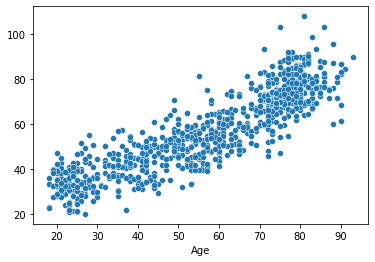

In [36]:
sns.scatterplot(y_test, predictions)

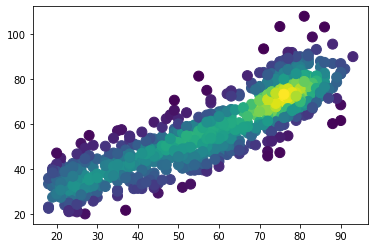

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Calculate the point density
xy = np.vstack([y_test,predictions])
z = gaussian_kde(xy)(xy)

fig,ax = plt.subplots()
ax.scatter(y_test, predictions, c=z, s=100)
plt.show()